### Zadanie 1
#### Liczba próbek (w jednym okresie) sygnału rzeczywistego $s(t) = sin(2 \pi t)$ wynosi N, gdzie N jest potęgą 2.

#### 1.a
- #### Przyjmując N = 8 wykreślić przebieg sygnału spróbkowanego, widmo amplitudowe i fazowe oraz zweryfikować eksperymentalnie słuszność twierdzenia Parsevala.

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def s(t):
    return np.sin(2 * np.pi * t)

N = 8

space = np.linspace(0, 1, N, endpoint = False)
signal = s(space)

spectrum = np.fft.fft(signal)

# wynik zawiera bardzo małe wartości pozostałe po przybliżeniach algorytmu, zaburzają one wykres, więc je zaokrąglimy
spectrum.real[np.abs(spectrum.real) < 1e-10] = 0
spectrum.imag[np.abs(spectrum.imag) < 1e-10] = 0

ampl_spectrum = np.abs(spectrum) / N
phase_spectrum = np.angle(spectrum)

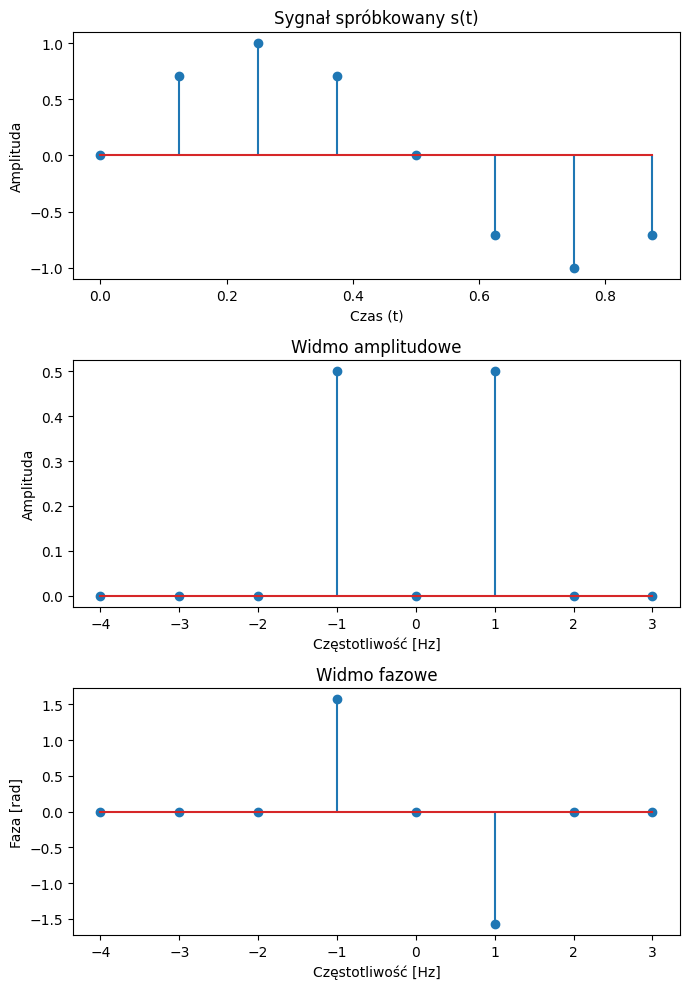

In [55]:
# Plotting

frequencies = np.fft.fftfreq(N) * N

fig, axs = plt.subplots(3, 1, figsize=(7, 10))
axs[0].stem(space, signal)
axs[0].set_title("Sygnał spróbkowany s(t)")
axs[0].set_xlabel("Czas (t)")
axs[0].set_ylabel("Amplituda")

axs[1].stem(frequencies, ampl_spectrum)
axs[1].set_title("Widmo amplitudowe")
axs[1].set_xlabel("Częstotliwość [Hz]")
axs[1].set_ylabel("Amplituda")

axs[2].stem(frequencies, phase_spectrum)
axs[2].set_title("Widmo fazowe")
axs[2].set_xlabel("Częstotliwość [Hz]")
axs[2].set_ylabel("Faza [rad]")

plt.tight_layout()
plt.show()

In [56]:
# Parseval

energy_time = np.sum(signal ** 2)
energy_freq = np.sum(np.abs(spectrum) ** 2) / N


print(f"Energia w dziedzinie czasu: {energy_time:.4f}")
print(f"Energia w dziedzinie częstotliwości: {energy_freq:.4f}")
print(f"Czy energie są równe? {'Tak' if np.isclose(energy_time, energy_freq) else 'Nie'}")

Energia w dziedzinie czasu: 4.0000
Energia w dziedzinie częstotliwości: 4.0000
Czy energie są równe? Tak


### Wnioski

Pole pod wykresem sygnału i suma próbek równe są sobie równe, zatem oba mają tę samą moc. Jest to zgodne z twierdzeniem Parsevala.

### 1.b
- #### Wykreślić wykres przedstawiający czas wyznaczania widma sygnału dyskretnego za pomocą algorytmu FFT w funkcji liczby próbek $N=2^l, l \in \{3, 4, ..., 13\}$. Skomentować kształt otrzymanego wykresu odnosząc się do teoretycznej złożoności obliczeniowej algorytmu FFT.

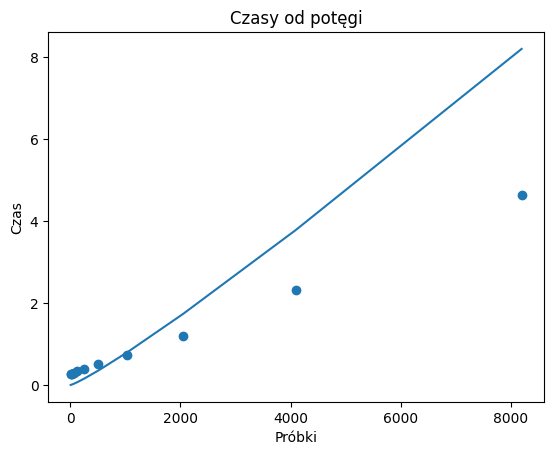

In [57]:
from time import perf_counter

exponents = np.arange(3, 13+1)
N = 2 ** exponents

REPEATS = 50_000
total_times = []

for exponent in exponents:
  sample_count = 2**exponent
  space = np.linspace(0, 1, sample_count)
  signal = s(space)
  start = perf_counter()
  for n in range(REPEATS):
    _ = np.fft.fft(signal)
  end = perf_counter()
  total_times.append(end - start)

SCALE_PLOT = 1/9000

plt.scatter(N, total_times)
plt.plot(N, N * np.log(N) * SCALE_PLOT)
plt.ylabel('Czas')
plt.xlabel('Próbki')
plt.title('Czasy od potęgi')
plt.show()

### Ex. 2

Let's calculate FFT for each signal

In [58]:
N = 88
A = 2
n = np.arange(N)

def generate_signal(phase):
    return A * np.sin(2 * np.pi * (n - phase) / N)

signals = [generate_signal(phase) for phase in (0, N/4, N/2, 3*N / 4)]
ffts = [np.fft.fft(signal) for signal in signals]

print(ffts[0][:5])

[ 2.44929360e-16+0.00000000e+00j -1.11060666e-14-8.80000000e+01j
  1.04178112e-15-4.36144914e-15j -2.94838665e-15-4.42206036e-15j
  1.39569290e-15-1.54708238e-15j]


The result contains very small numbers that are side effects of algorithm's approximation, let's round them down.

In [59]:
for fft in ffts:
    fft.real[np.abs(fft.real) < 1e-10] = 0
    fft.imag[np.abs(fft.imag) < 1e-10] = 0
print(ffts[0][:5])

[0. +0.j 0.-88.j 0. +0.j 0. +0.j 0. +0.j]


Now, let's plot their magnitudes and phases. To see plots for other phase shifts, adjust `index` (0..3).

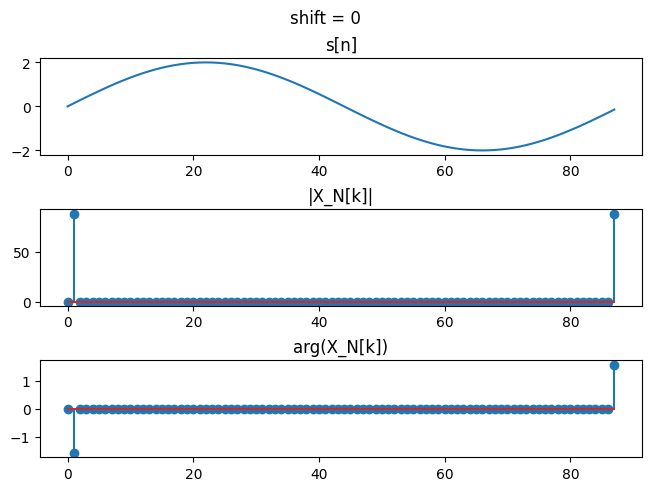

In [60]:
index = 0

ffts_amplitude = np.abs(ffts)
ffts_argument = np.angle(ffts)
fig, (ax1, ax2, ax3) = plt.subplots(3, layout='constrained')
fig.suptitle(f"shift = {index * 22}")
ax1.plot(signals[index])
ax1.set_title("s[n]")
ax2.stem(n, ffts_amplitude[index])
ax2.set_title("|X_N[k]|")
ax3.stem(n, ffts_argument[index])
ax3.set_title("arg(X_N[k])")
plt.show()

## Wnioski

Jak mówi slajd 18 wykładu 4:

$$
x(n) \rightarrow X(k)
$$

$$
x(n-m) \rightarrow X(k) e ^ {-j2\pi k \frac{m}{N}}
$$

To znaczy, widmo FFT sygnału przesuniętego jest cofnięte w fazie o $2 \pi k \frac{m}{N}$ względem widma sygnału pierwotnego. Amplituda pozostaje ta sama. Jako iż $X(k)$ ma prążki w $k=1$ i $k=87$ to biorąc dla m kolejne wartości z $[0, \frac{N}{4}, \frac{N}{2}, \frac{3N}{4}]$ , pierwszy prążek będzie się obracał zgodnie z ruchem wskazówek zegara, za każdym razem o $\frac{\pi}{4}$, a drugi prążek tak samo, tyle że w przeciwną stronę.

### Zadanie 3
#### Zbadać wpływ dopełnienia zerami na postać widma amplitudowego i widma fazowego dyskretnego sygnału 𝑠[𝑛] = $𝐴 (1 − \frac{n\mod N}{N})$ o amplitudzie 𝐴 = 4 i okresie podstawowym 𝑁 = 12. W tym celu dla każdej wartości 𝑁0 ∈ {0,1𝑁, 4𝑁, 9𝑁} wykreślić widmo amplitudowe i fazowe sygnału 𝑠[𝑛] dopełnionego 𝑁0 zerami. Skomentować otrzymane wyniki

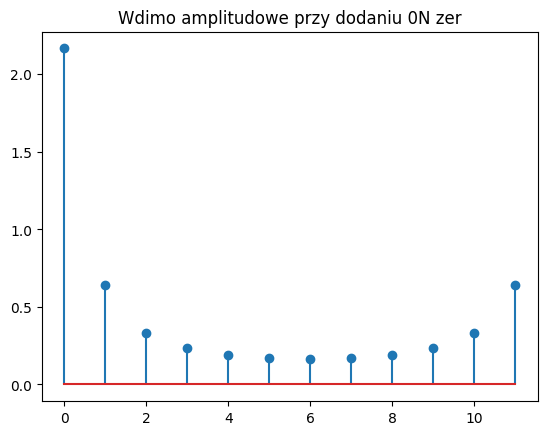

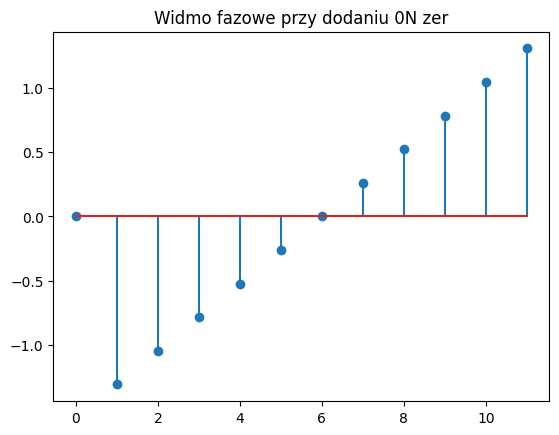

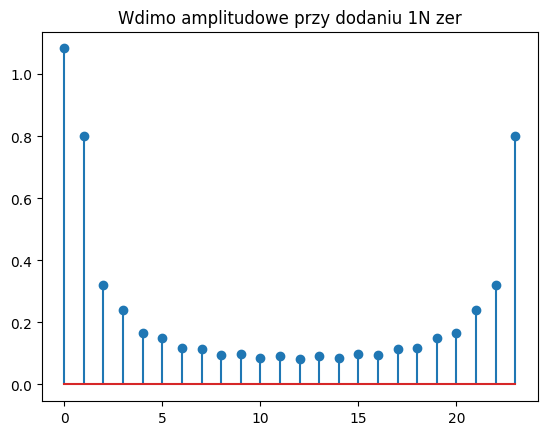

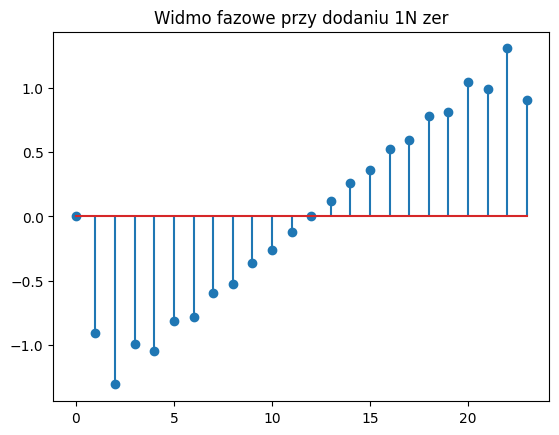

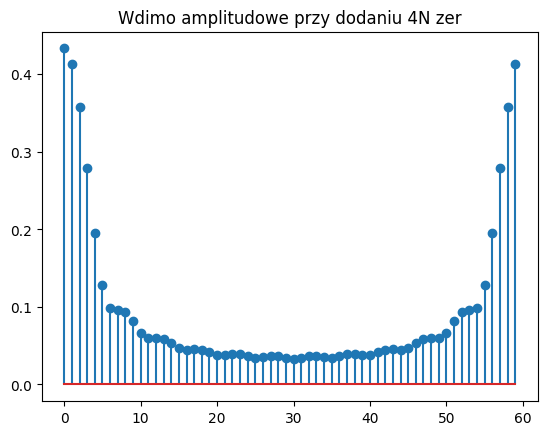

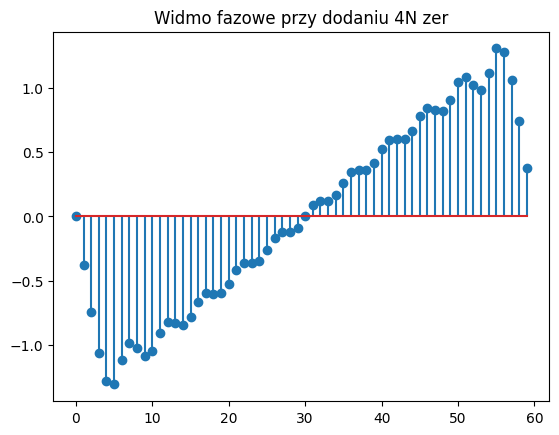

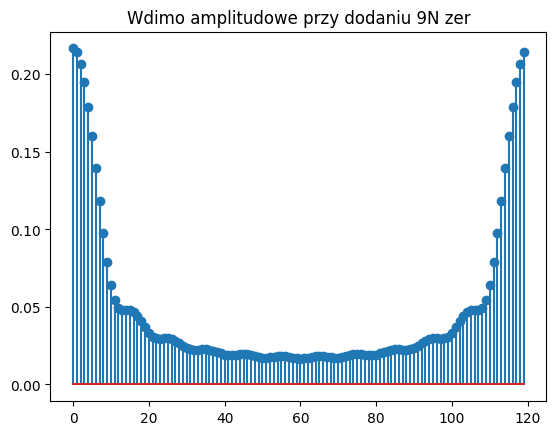

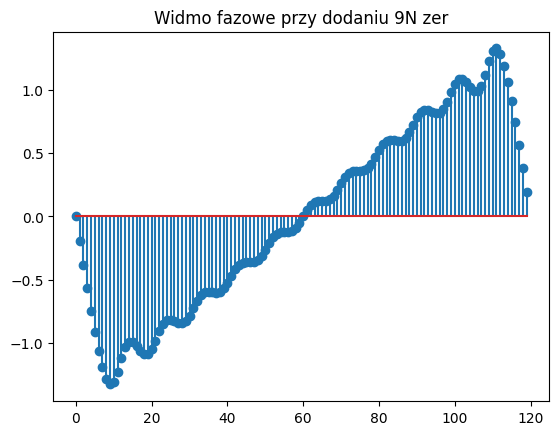

In [61]:
A = 4
N = 12
N0_list = [0, 1, 4, 9]

def s(n):
    return A * (1 - (n % N) / N)

signal = [s(n) for n in range(N)]

for n0_base in N0_list:
    n0 = n0_base * N
    s_with_zeros = signal + [0.0] * n0
    spectrum = np.fft.fft(s_with_zeros)
    ampl_spectrum = np.abs(spectrum) / (N + n0)
    phase_spectrum = np.angle(spectrum)

    plt.stem(ampl_spectrum)
    plt.title(f"Wdimo amplitudowe przy dodaniu {n0_base}N zer")
    plt.show()

    plt.stem(phase_spectrum)
    plt.title(f"Widmo fazowe przy dodaniu {n0_base}N zer")
    plt.show()

## Wnioski

Dopełnienie sygnału zerami zwiększa liczbę próbek na okres i "zagęszcza" otrzymane widma. Zwiększamy w ten sposób rozdzielczość wyliczanej dyskretnej transformaty Fouriera

# Zadanie 4

Sprawdźmy czy wszystkie częstotliwości składowe są wielokrotnościami rozdzielczości częstotliwościowej.

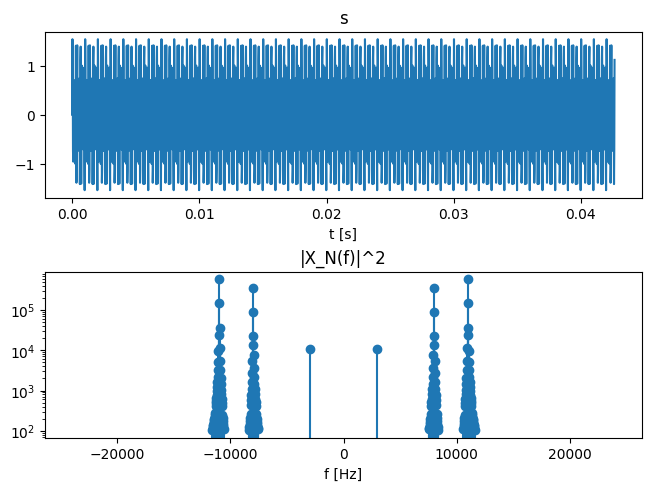

In [62]:
N = 2048
f_s = 48000
As = [0.1, 0.7, 0.9]
fs = [3000, 8000, 11000]
signal = [sum([A * np.sin(2 * np.pi * f * i/f_s) for A, f in zip(As, fs)])
     for i in range(N)]
fft = np.fft.fft(signal)
fft.real[np.abs(fft.real) < 10] = 0
fft.imag[np.abs(fft.imag) < 10] = 0
fft_energy = np.abs(fft) ** 2
frequencies = np.fft.fftfreq(N, 1/f_s)
fig, (ax1, ax2) = plt.subplots(2, layout='constrained')
ax1.plot(np.arange(N) / f_s, signal)
ax1.set_title("s")
ax1.set_xlabel("t [s]")
ax2.stem(frequencies, fft_energy)
ax2.set_title("|X_N(f)|^2")
ax2.set_xlabel("f [Hz]")
ax2.set_yscale('log')
plt.show()

## Wnioski

$$
\frac{f_1}{\Delta f} = \frac{f_1 N_1}{f_s} = 128, \frac{f_2}{\Delta f} = 341.3, \frac{f_3}{\Delta f} = 469.3
$$

Tak nie jest, **przeciek widma** wystąpi dla prążków 2 i 3, pomnożenie $N_1$ przez 3/2 nic nie da. Udało się go zaobserwować na wykresie, aczkolwiek widać, że „dodatkowe” prążki niosą energię kilka rzędów wielkości niższą niż te dominujące.